# 20160044 Shin Dong-Ha Assignment07
# Github Link : https://github.com/sinwindis/Assignment07

Importing Necessary Libraries

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

Provided code: Generating noisy data

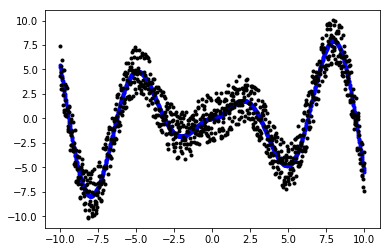

In [2]:
num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std
errorlist = list()

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

DEFINE FUNCTION: makeXhat

requires int p(precision)

Generated Matrix
$$AX = B$$
$$A = [1, x, \dots, x^p]$$
$$X = [\theta_0, \theta_1, \dots, \theta_p]$$
$$B = y1$$
$$\hat{X} = (A^TA)^{-1}A^TB$$

Returned Value
$$\hat{X}$$

In [3]:
def makeXhat(p):

    A = np.empty((num, p+1))
    Xhat = np.empty((1, p+1)) 

    
    for i in range(num):
        for j in range(p+1):
            A[i][j] = x[i]**j

    Xhat = np.matmul(np.matmul(inv(np.matmul(np.transpose(A), A)), np.transpose(A)), y1)
    return Xhat

DEFINE FUNCTION: drawGraph

requires coefficient matrix

In [4]:
def drawGraph(Xhat):
    p = Xhat.size
    Yhat = 0
    #initializing

    for i in range(p):
        Yhat += Xhat[i]*x**i

    plt.plot(x, y2, 'k.', alpha=0.3)
    plt.plot(x, Yhat, 'b-')
    title = "p = " + str(p-1)
    plt.title(title)
    plt.show()
    return Yhat

DEFINE FUNCTION: showError

In [5]:
def calError(source, fhat):
    errorArray = (source-fhat)**2
    sumofError = 0
    for i in range(source.size):
        sumofError += errorArray[i]
    
    return sumofError

main function: draws graphs varying precision

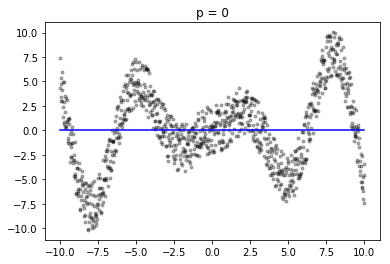

sum of error: 16371.601741915096


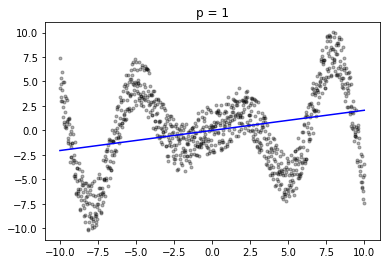

sum of error: 14992.79123938246


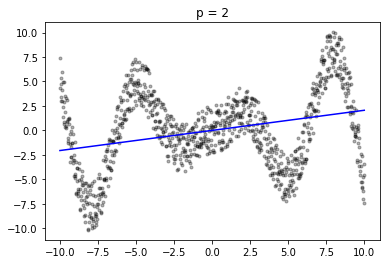

sum of error: 14992.791239382459


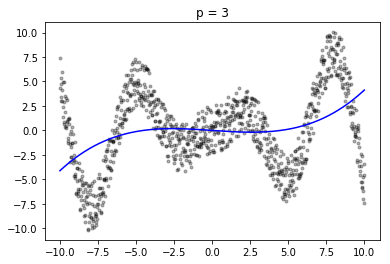

sum of error: 14375.444427143007


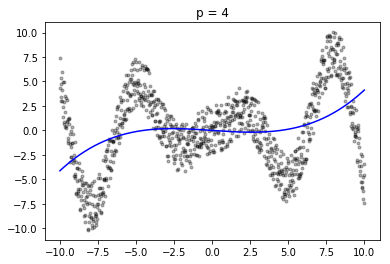

sum of error: 14375.444427143006


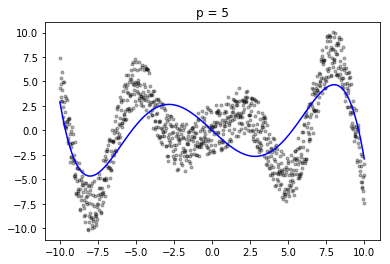

sum of error: 9603.509451790509


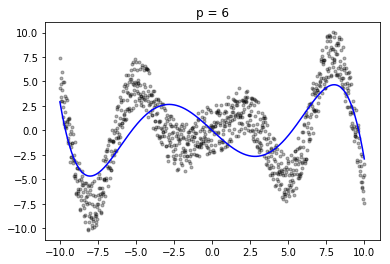

sum of error: 9603.509451790504


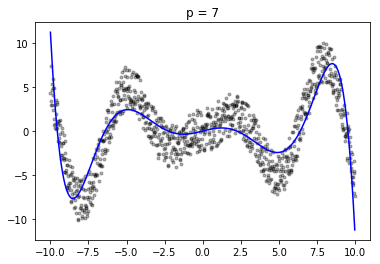

sum of error: 4790.0548035711245


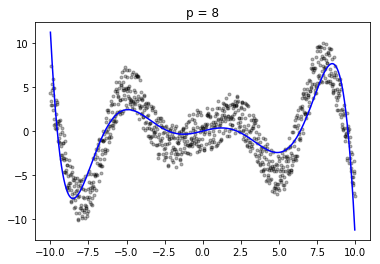

sum of error: 4790.054803571435


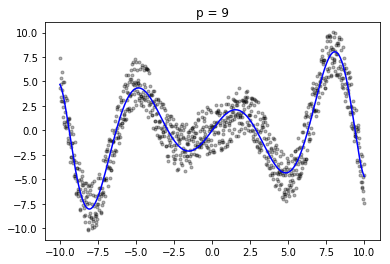

sum of error: 2289.0686811524165


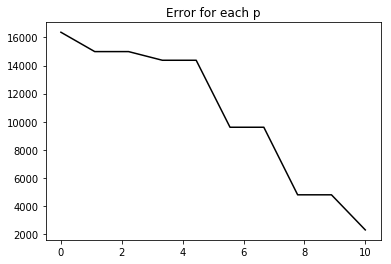

In [10]:
p = 10
del errorlist[:]
for i in range(p):
    Xhat = makeXhat(i)
    Yhat = drawGraph(Xhat)
    errorlist.append(calError(y2, Yhat))
    print('sum of error:', errorlist[i])

plt.plot(np.linspace(0,p,p), errorlist, "k-")
plt.title("Error for each p")
plt.show()
